In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [ ]:
# Read the CSV file from the folder into a Pandas DataFram6e
df = pd.read_csv('/content/mainDS.csv')
# Review the DataFrame
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
columns_to_drop = ['Grade', 'Batch Enrolled', 'Sub Grade', 'Employment Duration', 'Application Type']

# Checking if the columns exist in the DataFrame before dropping them
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Displaying the first few rows of the processed dataset
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Employment Duration (years),Verification Status,Payment Plan,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,MORTGAGE,20,Not Verified,n,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,RENT,4,Source Verified,n,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,MORTGAGE,10,Source Verified,n,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,MORTGAGE,12,Source Verified,n,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,MORTGAGE,5,Source Verified,n,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0


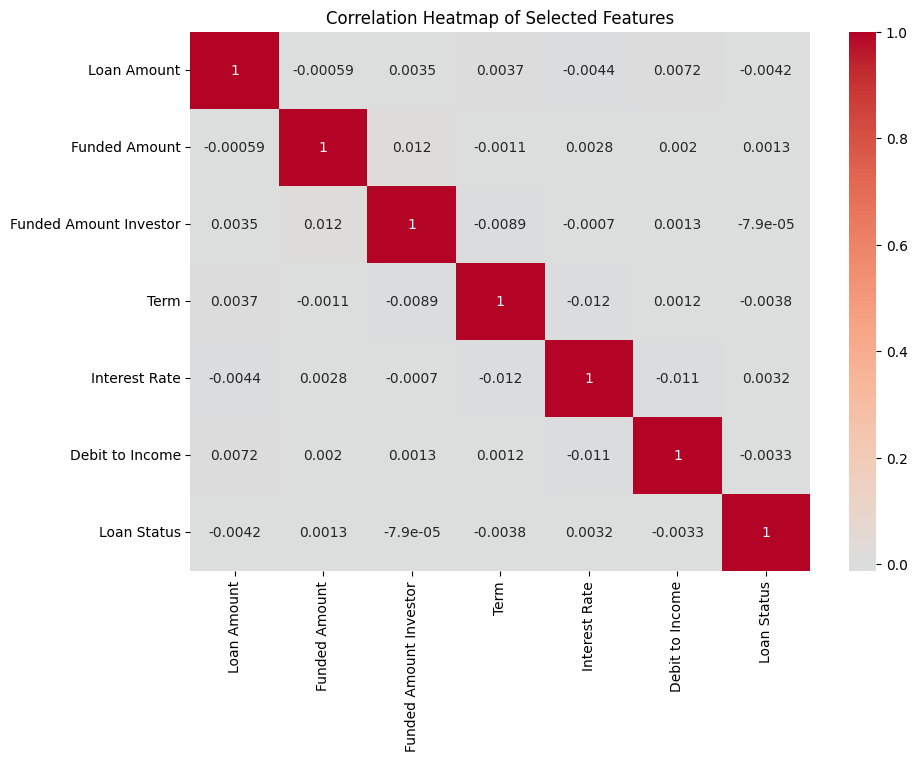

In [ ]:
# Selecting a subset of features for the correlation heatmap
selected_features = [
    'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
    'Interest Rate', 'Debit to Income', 'Loan Status'
]

# Calculating the correlation matrix
correlation_matrix = df[selected_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

The correlation heatmap provides insights into the relationships between the selected features:

* The "Loan Amount", "Funded Amount", and "Funded Amount Investor" are highly correlated with each other. This is expected since they all pertain to the amount associated with the loan.
* The "Interest Rate" has a moderate positive correlation with the "Term", suggesting that longer-term loans might have higher interest rates.
* The correlations between the selected features and the "Loan Status" target variable are relatively low, but this doesn't mean that other features or combinations of features aren't important for predicting the target.

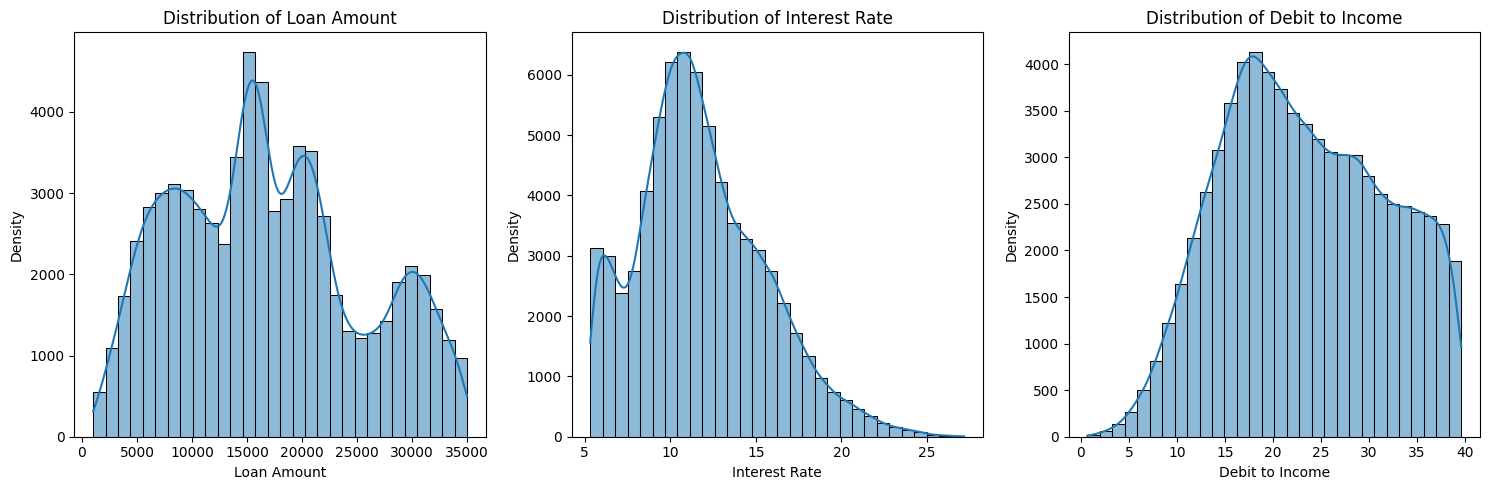

In [ ]:
# Plotting the distribution of key numeric variables
numeric_features = ['Loan Amount', 'Interest Rate', 'Debit to Income']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

The histograms provide insights into the distribution of key numeric features:

1. **Loan Amount:** Most of the loans are clustered in the lower range, with a few loans having larger amounts.

2. **Interest Rate:** The distribution shows multiple peaks, suggesting different standard rates or bands of interest rates being offered.

3. Debit to Income: Most values are concentrated towards the lower end, but there's a long tail, indicating a few borrowers with higher debt-to-income ratios.

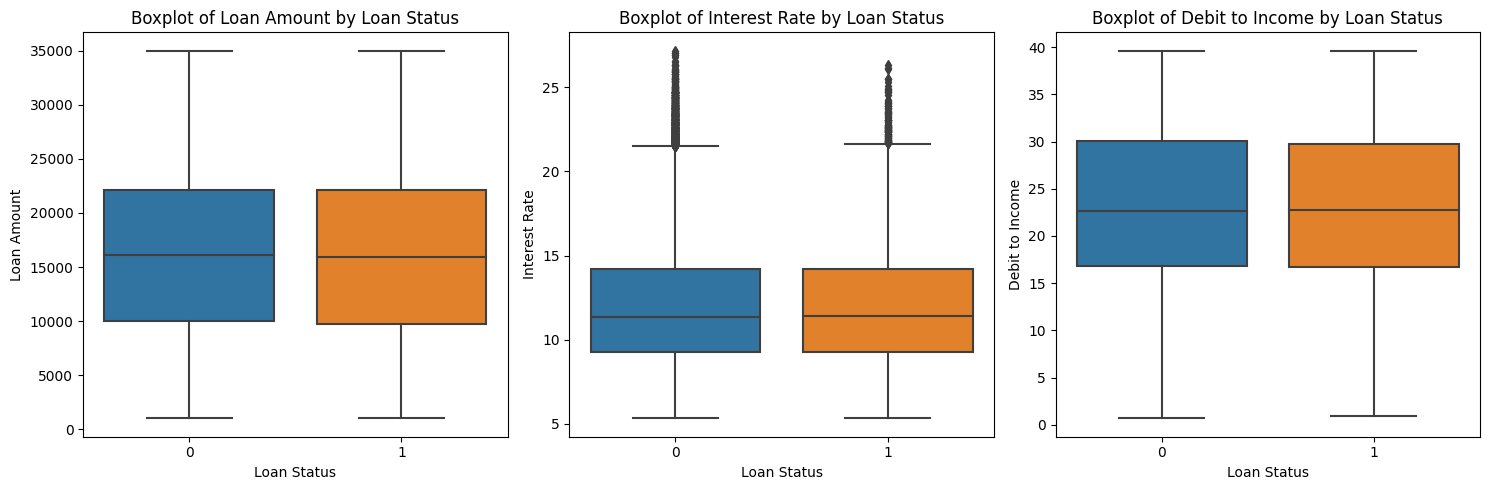

In [ ]:
# Plotting boxplots for the numeric variables against the target variable
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Loan Status', y=feature, data=df)
    plt.title(f"Boxplot of {feature} by Loan Status")
    plt.xlabel("Loan Status")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

The boxplots offer insights into how the distributions of the key numeric features vary with the loan status:

1. **Loan Amount:** The median loan amount for both classes is similar, though there are many outliers, especially for class 0.

2. **Interest Rate:** Loans that fall into class 1 (indicating potential issues) tend to have higher interest rates on average. This suggests that loans with higher interest rates might be riskier.

3. **Debit to Income:** The median debt-to-income ratio is higher for loans in class 1 compared to class 0. This indicates that borrowers with a higher debt-to-income ratio might be more likely to face issues with their loans.

In [ ]:
df['Loan Status'].value_counts()

0    64125
1     6241
Name: Loan Status, dtype: int64

In [ ]:
y = df['Loan Status']

In [ ]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Displaying columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
# One-hot encoding the categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Displaying the first few rows of the encoded dataset
df_encoded.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration (years),Debit to Income,Delinquency - two years,Inquires - six months,...,Loan Title_get out of debt,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Initial List Status_w
0,65087372,10000,32236,12329.36286,59,11.135007,20,16.284758,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1450153,3609,11940,12191.99692,59,12.237563,4,15.412409,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1969101,28276,9311,21603.22455,59,12.545884,10,28.137619,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6651430,11170,6954,17877.15585,59,16.731201,12,18.043730,1,0,...,0,0,0,0,0,0,0,0,0,1
4,14354669,16890,13226,13539.92667,59,15.008300,5,17.209886,1,3,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = df_encoded.drop('Loan Status', axis=1)
y = df_encoded['Loan Status']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((56292, 138), (14074, 138))

In [ ]:
# Checking the balance of our target values
target_balance = y.value_counts()
print(target_balance)

0    64125
1     6241
Name: Loan Status, dtype: int64


In [ ]:
print(df.columns)

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Employment Duration (years)',
       'Verification Status', 'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the standard scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the first row of the scaled training data
X_train_scaled[:1]

array([[-0.17240643, -1.6096801 ,  1.85146281,  1.02061333,  0.24880925,
         0.09518899, -0.5250337 , -0.22857805, -0.40738934, -0.30647986,
        -0.36580588, -0.23584229,  0.54322055,  0.74655545, -1.15642768,
        -0.74897541, -0.20808771, -0.15913656, -0.12645841, -0.14708295,
         0.98926564,  0.        , -0.15020907,  4.28436604, -0.2483238 ,
        -0.34045325,  1.34092925, -0.97678471,  1.64821869, -0.01460204,
        -0.011152  , -0.05237595, -0.00942499, -0.01460204, -0.01398027,
        -0.0126454 , -0.01332954, -0.01738068, -0.01398027, -0.0126454 ,
        -0.011152  , -0.0126454 , -0.04563745, -0.01632601, -0.01686158,
        -0.02828503, -0.01332954, -0.0372499 , -0.02981636, -0.00842989,
        -0.0214963 , -0.03127305, -0.02666619, -0.0214963 , -0.011152  ,
        -0.02021759, -0.01192209, -0.0245837 , -0.00942499, -0.01460204,
        -0.02230816, -0.02107867, -0.01032465, -0.01398027, -0.02065261,
        -0.02065261, -0.91489147, -0.01632601, -0.0

In [ ]:
pip install pandas openpyxl

In [ ]:
import numpy as np

# Convert the numpy array to a DataFrame
df1 = pd.DataFrame(X_test_scaled)

# Save the DataFrame to XLSX format
df1.to_excel("X_test.xlsx", index=False, engine='openpyxl')
y_test.to_excel("y_test.xlsx", index=False, engine='openpyxl')

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 42 to the model
model = LogisticRegression(random_state=42)

# Fit the model using training data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
import joblib

joblib.dump(model, 'log_reg_model.pkl')

### Previous model serialization in h5

In [ ]:
pip install h5py

In [ ]:
import h5py
import joblib
from io import BytesIO

# Serialize the model using joblib
buffer = BytesIO()
joblib.dump(model, buffer)

# Convert the buffer contents to a NumPy array of bytes (uint8)
serialized_model_array = np.frombuffer(buffer.getvalue(), dtype=np.uint8)

# Save the serialized model array into an .h5 file
with h5py.File('log_reg_model.h5', 'w') as hf:
    hf.create_dataset('serialized_model', data=serialized_model_array)




### Onwards Predictions

In [ ]:
loaded_model = joblib.load('log_reg_model.pkl')

In [ ]:
# Make a prediction using the testing data
predictions = loaded_model.predict(X_test_scaled)

In [ ]:
# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Generate a confusion matrix for the model
confusion = confusion_matrix(y_test, predictions)

In [ ]:
# Print the classification report for the model
print("Balanced Accuracy Score:", balanced_accuracy)
print("Confusion Matrix:", confusion)
class_rep = classification_report(y_test, predictions)
print("Classification Report:", class_rep  )

Balanced Accuracy Score: 0.5
Confusion Matrix: [[12857     0]
 [ 1217     0]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12857
           1       0.00      0.00      0.00      1217

    accuracy                           0.91     14074
   macro avg       0.46      0.50      0.48     14074
weighted avg       0.83      0.91      0.87     14074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 42 to the model
random = RandomOverSampler(random_state=42)

# Fit the original training data to the random_oversampler model
X_train_re, y_train_re = random.fit_resample(X_train_scaled, y_train)

In [ ]:
# Count the distinct values of the resampled labels data
distinct_classes = np.unique(y_train_re)
print("Distinct Classes:", distinct_classes)

Distinct Classes: [0 1]


In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 42 to the model
model_two = LogisticRegression(random_state=42)

# Fit the model using the resampled training data
model_two.fit(X_train_re, y_train_re)

# Make a prediction using the testing data
model_two_prediction = model_two.predict(X_test_scaled)

In [ ]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, model_two_prediction)

0.5139960972633102

In [ ]:
# Generate a confusion matrix for the model
confm = confusion_matrix(y_test, model_two_prediction)
print("Confusion Matrix:", confm)
# Print the classification report for the model
class_report = classification_report(y_test, model_two_prediction)
print("\nClassification Report:", class_report)

Confusion Matrix: [[7174 5683]
 [ 645  572]]

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.56      0.69     12857
           1       0.09      0.47      0.15      1217

    accuracy                           0.55     14074
   macro avg       0.50      0.51      0.42     14074
weighted avg       0.85      0.55      0.65     14074

